In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
train_data = np.loadtxt('train.txt')
test_data = np.loadtxt('test.txt')


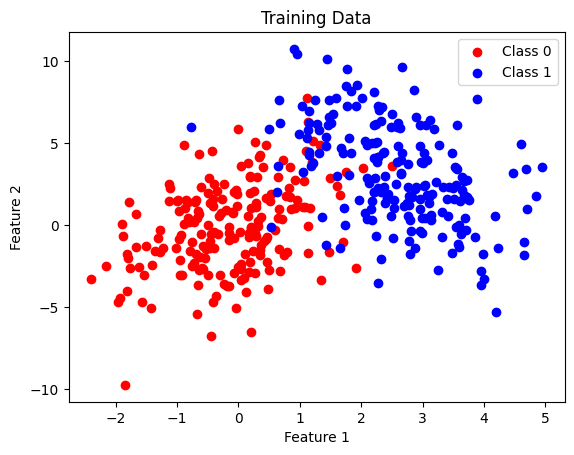

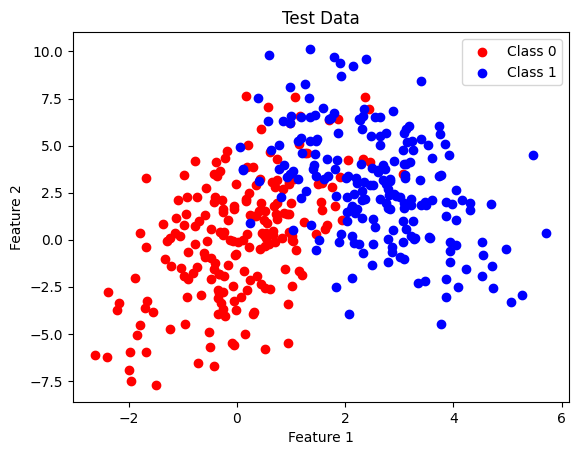

In [2]:
# Split the data into features and labels
train_X, train_y = train_data[:, :2], train_data[:, 2]
test_X, test_y = test_data[:, :2], test_data[:, 2]

 
def plot_data(X, y, title):
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    
    plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

 
plot_data(train_X, train_y, 'Training Data')

 
plot_data(test_X, test_y, 'Test Data')


In [4]:
from collections import Counter
from sklearn.metrics import accuracy_score
import numpy as np

 
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# KNN classifier implementation
def knn_classifier(train_X, train_y, test_X, k):
    predictions = []
    for test_point in test_X:
        # Calculate distances from the test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in train_X]
        
        # Get the k nearest neighbors (indices)
        k_nearest_indices = np.argsort(distances)[:k]
        
        # Get the labels of the k nearest neighbors
        k_nearest_labels = train_y[k_nearest_indices]
        
        # Predict the majority class
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    
    return np.array(predictions)

 
k_values = [7, 51, 151, 201, 251]
accuracies = []

for k in k_values:
    predictions = knn_classifier(train_X, train_y, test_X, k)
    accuracy = accuracy_score(test_y, predictions)
    accuracies.append(accuracy)

 
k_accuracies = list(zip(k_values, accuracies))

 
for k, accuracy in k_accuracies:
    print(f'Accuracy for k={k}: {accuracy:.2f}')


Accuracy for k=7: 0.90
Accuracy for k=51: 0.88
Accuracy for k=151: 0.87
Accuracy for k=201: 0.83
Accuracy for k=251: 0.79


### Explanation of Accuracy Decrease

As the value of \( k \) increases, the classification accuracy tends to decrease. This is because larger values of \( k \) include more neighbors in the decision process, some of which are farther away from the test point. These distant neighbors are more likely to belong to a different class, which leads to more misclassifications.

With smaller values of \( k \), the classifier focuses on the local patterns near the test point, often resulting in more accurate predictions, especially when the classes are well-separated. As \( k \) increases, the classifier starts to take into account a broader range of points, including ones that are further away and less relevant. This makes the classifier more "global" in its approach, which can lead to a loss of precision as it begins to consider points from different classes.

In conclusion, a smaller \( k \) is typically optimal for this type of classification task because it better captures the local structure of the data. In contrast, larger values of \( k \) can reduce accuracy by incorporating more distant and potentially irrelevant points into the classification process.


# Part 2

### Task 2: K-Means Clustering (Written part)

#### Dataset:
The 1-dimensional instances are:  
\[ 1, 2, 4, 5, 10, 11, 12, 25 \]

#### Step 1: Initial Setup
We are asked to run K-Means clustering with \( k = 3 \), and the initial centroids being the first 3 instances:  
\[ C_1 = 1, \ C_2 = 2, \ C_3 = 4 \]

#### Step 2: K-Means Iterations

**Iteration 1:**

1. **Assign points to the nearest centroid:**

   - For centroid \( C_1 = 1 \):  
     - Distance to 1: 0  
     - Distance to 2: 1  
     - Distance to 4: 3  
     - Distance to 5: 4  
     - Distance to 10: 9  
     - Distance to 11: 10  
     - Distance to 12: 11  
     - Distance to 25: 24  
     - Closest points: [1]  

   - For centroid \( C_2 = 2 \):  
     - Distance to 1: 1  
     - Distance to 2: 0  
     - Distance to 4: 2  
     - Distance to 5: 3  
     - Distance to 10: 8  
     - Distance to 11: 9  
     - Distance to 12: 10  
     - Distance to 25: 23  
     - Closest points: [2]  

   - For centroid \( C_3 = 4 \):  
     - Distance to 1: 3  
     - Distance to 2: 2  
     - Distance to 4: 0  
     - Distance to 5: 1  
     - Distance to 10: 6  
     - Distance to 11: 7  
     - Distance to 12: 8  
     - Distance to 25: 21  
     - Closest points: [4, 5, 10, 11, 12, 25]  

2. **Update centroids** based on the average of points assigned to each cluster:

   - New \( C_1 \): Average of [1] = 1  
   - New \( C_2 \): Average of [2] = 2  
   - New \( C_3 \): Average of [4, 5, 10, 11, 12, 25] = \( \frac{4 + 5 + 10 + 11 + 12 + 25}{6} = 11.17 \) (approximately)  

**Iteration 2:**

1. **Assign points to the nearest centroid:**

   - For \( C_1 = 1 \):  
     - Closest points: [1]  

   - For \( C_2 = 2 \):  
     - Closest points: [2]  

   - For \( C_3 = 11.17 \):  
     - Closest points: [4, 5, 10, 11, 12, 25]  

2. **Update centroids** based on the average of points assigned to each cluster:

   - New \( C_1 \): 1  
   - New \( C_2 \): 2  
   - New \( C_3 \): Average of [4, 5, 10, 11, 12, 25] = 11.17  

Since the assignments have not changed between the two iterations, the algorithm stops here.

#### Final Clusters:
- **Cluster 1 (centroid = 1):** [1]  
- **Cluster 2 (centroid = 2):** [2]  
- **Cluster 3 (centroid ≈ 11.17):** [4, 5, 10, 11, 12, 25]  



# Part 3


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

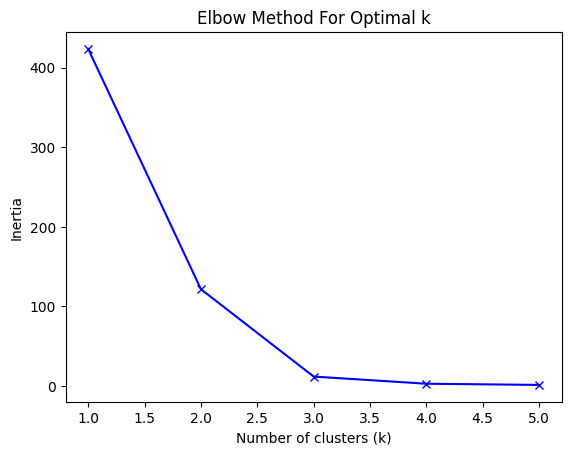

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = np.array([1, 2, 4, 5, 10, 11, 12, 25]).reshape(-1, 1)


inertias = []
k_values = range(1, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)


plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()
